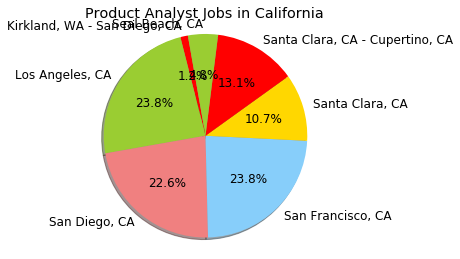

In [5]:
from collections import Counter
import pandas as pd
import json
import urllib2
from pandas import ExcelWriter
from pandas import ExcelFile
from careerjet_api_client import CareerjetAPIClient
import matplotlib.pyplot as plt

cj  =  CareerjetAPIClient("en_US");

result_QA = cj.search({
                        'location'    : 'San Francisco, CA',
                        'keywords'    : 'Product Analyst',
                        'affid'       : '61b9da404c186f24e983f7a4ff333bc5',
                        'user_ip'     : '2601:642:4301:1fe4:e8bd:c677:92b:d98c',
                        'url'         : 'https://www.careerjet.com/search/jobs?s=Business+Intelligence+Consultant&l=London&sort=salary',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36'
                      });
result_QA

result_BI = cj.search({
                        'location'    : 'Santa Clara, CA',
                        'keywords'    : 'Product Analyst',
                        'affid'       : '61b9da404c186f24e983f7a4ff333bc5',
                        'user_ip'     : '2601:642:4301:1fe4:e8bd:c677:92b:d98c',
                        'url'         : 'https://www.careerjet.com/search/jobs?s=Business+Intelligence+Consultant&l=London&sort=salary',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36'
                      });
result_BI

result_DSA = cj.search({
                        'location'    : 'San Diego, CA',
                        'keywords'    : 'Product Analyst',
                        'affid'       : '61b9da404c186f24e983f7a4ff333bc5',
                        'user_ip'     : '2601:642:4301:1fe4:e8bd:c677:92b:d98c',
                        'url'         : 'https://www.careerjet.com/search/jobs?s=data+security+analyst&l=london',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36'
                      });
result_DSA

result_LA = cj.search({
                        'location'    : 'Los Angeles, CA',
                        'keywords'    : 'Product Analyst',
                        'affid'       : '61b9da404c186f24e983f7a4ff333bc5',
                        'user_ip'     : '2601:642:4301:1fe4:e8bd:c677:92b:d98c',
                        'url'         : 'https://www.careerjet.com/search/jobs?s=data+security+analyst&l=london',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36'
                      });
result_LA

result_SB = cj.search({
                        'location'    : 'Seal Beach, CA',
                        'keywords'    : 'Product Analyst',
                        'affid'       : '61b9da404c186f24e983f7a4ff333bc5',
                        'user_ip'     : '2601:642:4301:1fe4:e8bd:c677:92b:d98c',
                        'url'         : 'https://www.careerjet.com/search/jobs?s=data+security+analyst&l=london',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36'
                      });
result_SB


jobs = Counter(result_QA)+ Counter(result_BI)+ Counter(result_DSA)+ Counter(result_LA)+ Counter(result_SB)
jobs

jobs_all=pd.DataFrame(jobs['jobs'],columns=['company','description','locations','title','url'])
jobs_all

writer = pd.ExcelWriter('Data Scrapped_Jobs.xlsx')
jobs_all.to_excel(writer,'Sheet')
writer.save()


frame  = pd.read_excel("Data Scrapped_Jobs.xlsx")


table = frame.groupby(['locations']).size()
# Data to plot
labels = table.index
sizes =  table.values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','gold']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle= 100)
plt.title("Product Analyst Jobs in California") 
plt.axis('equal')
plt.show()



In [7]:
def keywords_extractor (description):
    list1 = ['warehousing', 'big data','Quantitative','Analyst','business',
             'data management','statistics','Banking', 'business intelligence', 'Market Intelligence',
             'social media analytics', 'text mining','Project management','machine learning', 
             'algorithm', 'marketing', 'data visualization','excel','data models','mining','reporting','report',
             'spss','sas','dashboards','modelling','sqoop','cloud','warehouse','warehousing','architecture',
             'forecast','forecasting','predictive','prediction','yarn','c#','etl','rstudio','anaconda','unix',
             'linux','shell','scripting','ms office']
    keywords = []
    for i in list1:
        if (description.find(i,0) > 0):
            keywords.append(i)
    return keywords

jobs_all['Management Skills'] = frame.apply(lambda row: keywords_extractor(row['description']), axis=1)


list2= ['SAS','R','Stata','python','risk modelling','Python','NoSQL','MYSQL','SCALA','SQL','JAVA','HADOOP','C','Visual Basic','C++','PIG','HIVE','REDSHIFT','Excel','Office','bash','java','c++','ruby','perl','matlab','javascript','scala','php','d3.js','sas','spss','d3','saas','pandas','numpy','scipy','sps','spotfire','scikit.learn','splunk','h2o','hadoop','mapreduce','spark','pig','hive','shark','sql','nosql','hbase','cassandra','mongodb','mysql','mssql','postgresql','oracle db','rdbms','bigquery','sas','google analytics','aws','database','analytics','math','statistics','software','coding','machine learning','artificial intelligence','amazon','azure','tableau', 'alteryx', 'postgres','data structures']
frame.head()

def keywords_extractor1 (description):
    list2 = ['SAS','R','Stata','python','risk modelling','Python','NoSQL','MYSQL','SCALA','SQL','JAVA','HADOOP','C',
             'Visual Basic','C++','PIG','HIVE','REDSHIFT','Excel','Office','bash','java','c++','ruby','perl','matlab',
             'javascript','scala','php','d3.js','sas','spss','d3','saas','pandas','numpy','scipy','sps','spotfire',
             'scikit.learn','splunk','h2o','hadoop','mapreduce','spark','pig','hive','shark','sql','nosql','hbase',
             'cassandra','mongodb','mysql','mssql','postgresql','oracle db','rdbms','bigquery','sas','google analytics',
             'aws','database','analytics','math','statistics','software','coding','machine learning','artificial intelligence',
             'amazon','azure','tableau', 'alteryx', 'postgres','data structures']
    Technical = []
    for i in list2:
        if (description.find(i,0) > 0):
            Technical.append(i)
    return Technical

jobs_all['Technical_skills'] = frame.apply(lambda row: keywords_extractor1(row['description']), axis=1)
jobs_all

,company,description,locations,title,url,Management Skills,Technical_skills
0,anaplan,begun. Anaplan is looking for a high perform...,"San Francisco, CA",Product Marketing Manager (Supply Chain),http://jobviewtrack.com/en-us/job-484e417e5814...,[],"[R, C]"
1,McKesson Technologies Limited,Quality Assurance <b>Analyst</b> 3 McKesson ...,"San Francisco, CA",Quality Assurance Analyst 3,http://jobviewtrack.com/en-us/job-4f4f417c5805...,"[Analyst, business]",[]
2,"Williams-Sonoma Singapore Pte, Ltd.",Services Position Type: Full-time JOB DESC...,"San Francisco, CA",Senior Web Analyst - A/B Testing,http://jobviewtrack.com/en-us/job-1f1d417e480a...,[Analyst],"[R, C]"
3,Williams-Sonoma,Services Position Type: Full-time JOB DESC...,"San Francisco, CA",Senior Web Analyst - A/B Testing,http://jobviewtrack.com/en-us/job-1f1d417e480a...,[Analyst],"[R, C]"
4,Sephora,", supportive, smart, and kind leaders and team...","San Francisco, CA",Financial Analyst,http://jobviewtrack.com/en-us/job-121b416b440a...,[],[]
5,Aquent,<b>Analyst</b> for a 3-4 month contract that ...,"San Francisco, CA",Digital Media Investment Analyst,http://jobviewtrack.com/en-us/job-1d1e41644312...,[Analyst],[]
6,Sephora,at Sephora: Sephora is looking for a Senior ...,"San Francisco, CA",Senior Analyst - Marketing Analytics,http://jobviewtrack.com/en-us/job-1d12416c4305...,"[Analyst, marketing]",[C]
7,Western Union,"Union could be for you. Right now, we are s...","San Francisco, CA","Analyst, Product",http://jobviewtrack.com/en-us/job-121a417d5f0b...,[Analyst],[R]
8,Twilio,a talented <b>Product</b> <b>Analyst</b> to d...,"San Francisco, CA","Product Analyst, Messaging",http://jobviewtrack.com/en-us/job-134f417d5f0b...,[Analyst],"[R, Python]"
9,Moody's,The <b>Product</b> <b>Analyst</b> may perform ...,"San Francisco, CA",Product Analyst,http://jobviewtrack.com/en-us/job-121a417d5f0b...,[Analyst],[]


In [8]:
writer = pd.ExcelWriter('Data Scrapped Jobs with Keywords.xlsx')
jobs_all.to_excel(writer,'Sheet')
writer.save()

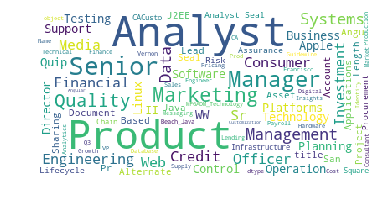

In [9]:
! pip install wordcloud
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = pd.read_excel("Data Scrapped_Jobs.xlsx")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)